In [1]:
from fonctions import *

In [2]:
# récupération des articles et des tags

dic = lire_json("articlesTags.json")

new_dic = reorganiser_dico(dic)

In [3]:
# séparation des informations dans trois listes différentes

chemins_articles = [x for x in new_dic.keys()]

liste_tags = [x[1] for x in new_dic.values()]

liste_titres = [x[2] for x in new_dic.values()]

In [4]:
# Vectorisation des documents et création du model

X, V = creer_X(liste_tags)

model = creer_model_KM(4, X)

predictions = model.predict(X)

print(predictions[:100])
print(effectifs_clusters(model))

[0 0 2 0 1 1 0 0 3 3 2 2 1 0 0 3 3 0 0 0 2 2 0 3 2 0 2 0 3 3 3 3 1 2 3 2 1
 0 1 1 3 1 1 1 3 0 1 0 0 1 0 3 0 0 3 3 2 1 0 2 0 2 3 3 0 0 0 0 1 0 2 0 0 3
 0 2 0 1 3 2 0 1 0 1 0 0 0 0 0 3 2 0 0 2 1 1 1 0 1 1]
{0: 2534, 2: 870, 1: 925, 3: 1356}


In [6]:
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

nb_clusters = 4

#Tests sur les différents ngrams 
model = KMeans(n_clusters=nb_clusters)

V = TfidfVectorizer(ngram_range=(2,3))

liste_t = [" ".join(x) for x in liste_tags]

print(liste_tags[0])
print(liste_t[:3])

X = V.fit_transform(liste_t).toarray()

print(X[:3])
print(len(X))

['NNP', 'FW', 'FW', 'NNS', 'VBP', 'JJ', 'NN', 'IN', 'FW', 'JJ', 'FW', 'IN', 'CD']
['NNP FW FW NNS VBP JJ NN IN FW JJ FW IN CD', 'NNP NNS VBP NN : IN NNS VBP JJR NN NN NN JJ NN', 'NNP FW FW . NNS NNS :']
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
5685


In [7]:
model.fit(X)

all_predictions = model.predict(X)

print(all_predictions[:100])

[1 1 3 1 0 1 1 1 2 2 3 3 1 1 1 2 2 1 1 1 1 1 1 2 1 1 3 1 1 2 2 2 0 3 1 3 1
 1 0 0 2 0 1 1 2 1 0 1 1 0 1 2 1 1 2 2 3 0 1 3 1 3 2 1 1 1 1 1 0 1 3 1 1 1
 1 3 1 0 2 3 1 0 1 0 1 1 1 1 1 1 3 1 1 3 0 0 0 1 0 0]


In [8]:
dic_res = {}

for i in range(len(X)):
    #print(X[i])
    num_cluster = all_predictions[i]
    titre = liste_titres[i]
    tags = liste_t[i]
    vecteur = X[i]
    dic_res.setdefault(num_cluster,  [])
    dic_res[num_cluster].append((titre, tags, vecteur))

In [9]:
from random import randint

echantillons = []

taille_echantillons = 5
    
for i in range(nb_clusters):
    echantillons.append([])
    #print(len(dic_res[i]))
    for j in range(taille_echantillons):
        indice = randint(0, len(dic_res[i]))
        #print(indice)
        echantillons[i].append(dic_res[i][indice][:1])

for i in range(len(echantillons)):
    print("Cluster %s : %s articles" % (i, len(dic_res[i])))
    for titre in echantillons[i]:
        print(titre)
    print("-"*10)

Cluster 0 : 610 articles
('CHINE - Mystère à Chongqing',)
('Vendée Globe : Michel Desjoyeaux cache sa joie',)
("Vendée Globe. Kito de Pavant: «J'ai besoin de comprendre...»",)
('Vendée Globe : Eliès attend les secours',)
('FRAUDE MADOFF: DES ORGANISATIONS CARITATIVES FRAPPÉES DE PLEIN FOUET',)
----------
Cluster 1 : 3260 articles
("L'Egypte fait de grand efforts pour contrôler la situation à Gaza",)
('Des recommandations « offensives »',)
('Sarkozy poursuit ses efforts de paix, en appelle Damas à faire pression',)
('La dernière compagne de Raymond Devos jugée jeudi pour abus de faiblesse',)
('Le recours aux observateurs trangers cart de jour en jour',)
----------
Cluster 2 : 1117 articles
('Scandale sanitaire - Hormones de croissance : relaxe générale',)
('Nouveau décès après une erreur médicale',)
('A table avec le diable',)
('Imposer le vaccin contre le cancer du col?',)
("Mort d'un enfant dans un hôpital: la garde à vue d'une infirmière prolongée",)
----------
Cluster 3 : 698 articl

In [10]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]

terms = V.get_feature_names()

for i in range(nb_clusters):
    print("Cluster %d:" % i, end='')
    for ind in order_centroids[i, :10]:
        print('(%s)' % terms[ind], end='')
    print()

Cluster 0:(nnp nnp)(nnp nnp nnp)(nnp nnp nn)(nnp nn)(nn nn)(nn nnp)(nn nnp nnp)(nnp nn nn)(nnp nnp vbz)(nn nn nn)
Cluster 1:(nn nn)(jj nn)(nnp nn)(nns vbp)(nnp nnp)(nn nnp)(nns nns)(nn nns)(nn in)(jj nn nn)
Cluster 2:(nn nn)(nn nn nn)(nnp nn nn)(nnp nn)(nn nnp)(jj nn)(nn nn nnp)(jj nn nn)(nn jj)(nn nnp nn)
Cluster 3:(fw fw)(fw fw fw)(fw fw nn)(fw nn)(nn fw fw)(nn fw)(nn nn)(nnp fw fw)(nnp fw)(nnp nn)


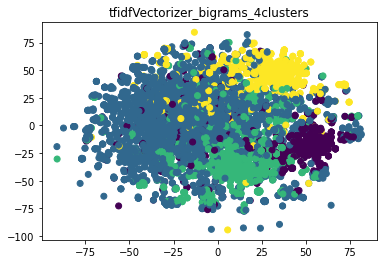

In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Defining Model
model_tsne = TSNE(learning_rate=100)

# Fitting Model
transformed = model_tsne.fit_transform(X)

# Plotting 3d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

# à faire : ajouter le numéro de cluster

plt.scatter(x_axis, y_axis, c=all_predictions)
plt.title('tfidfVectorizer_bigrams_4clusters')
#plt.savefig("testbigrams5.png")
plt.show()